In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 3.5})

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
bench = pd.DataFrame(index=[1, 2, 3, 4])
for lang in ['cpp', 'java', 'rust']:
    bench[lang] = pd.read_csv('nprimes/{}_bench.csv'.format(lang)).set_index('nthreads')

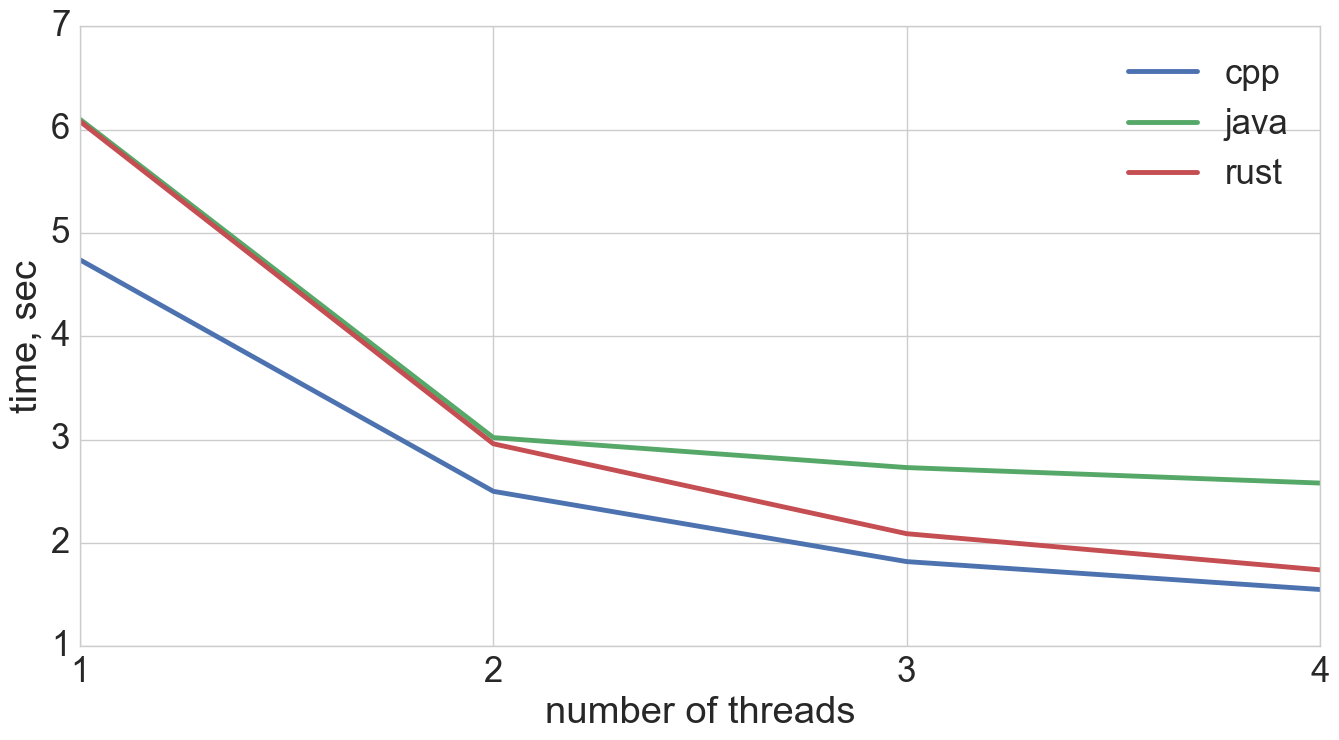

In [3]:
bench.plot(xticks=[1,2, 3, 4], figsize=(16, 8))
plt.xlabel('number of threads')
plt.ylabel('time, sec')
plt.savefig('bench.png', transparent=True)

In [4]:
echo_bench = pd.read_csv('echod/bench.csv', index_col='lang')

In [8]:
class KFormater(matplotlib.ticker.Formatter):
    def __call__(self, x, pos):
        if x == 0:
            return "0"
        return "{:0.0f}K".format(x/1000)

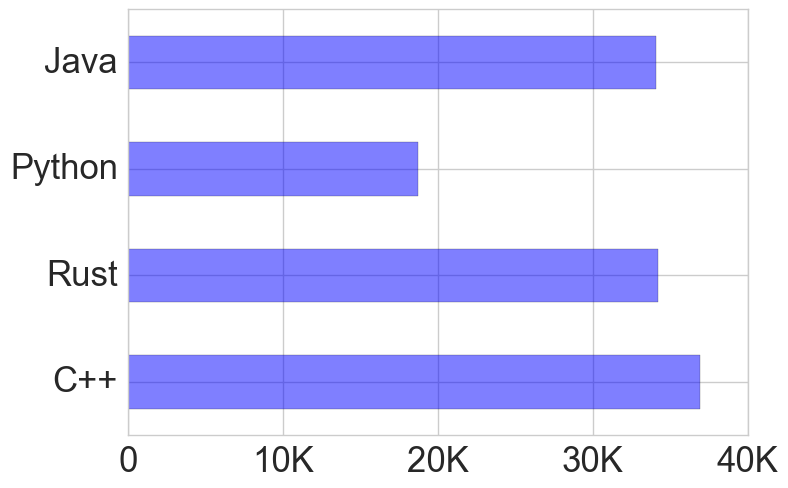

In [23]:
echo_bench.plot.barh(alpha=0.5)
plt.axes().xaxis.set_major_formatter(KFormater())
plt.legend().set_visible(False)
plt.axes().set_ylabel("")
plt.axes().set_xticks(range(0, 50000, 10000))
plt.savefig('rps.png', dpi=600, transparent=True, bbox_inches='tight')